## Notebooks Overview
This section provides an overview of the key tasks and analyses carried out in the additional notebooks of the 'Quitting Predictor' project.

### Data Filtering:

Invalid or illogical data entries were systematically removed to ensure the dataset's quality and reliability.
Instances with false experience (exp_check == 1), negative experience in job_duration columns, and total experience exceeding 900 months were excluded.
Records associated with job titles like 'intern', 'student', 'owner', etc., were filtered out to focus on meaningful job roles.

### Variance Threshold for Feature Selection:

Variance thresholding was employed to select features with high variance, thereby identifying relevant features that contribute significantly to the model's predictive power.

### Numeric Categorization:

Non-numeric features like 'job_level' and 'linkedin_connections' were transformed into numeric categories, facilitating their integration into machine learning algorithms.

### Categorization of Job Titles:

Employed fuzzy matching techniques to categorize job titles into six major categories: 'Software Development', 'Business Intelligence', 'Cyber Security', 'Cloud/DevOps', 'Data Science/Machine Learning', and 'Other'.
Entries classified as 'Other' were excluded to ensure consistency and relevance in subsequent analyses.

### Principal Component Analysis (PCA):

Implemented PCA on the top 1000 companies to minimize the number of columns while retaining maximum variance.
This dimensionality reduction technique optimizes feature space for efficient modeling and interpretation.

### Data Balancing:

Utilized the Synthetic Minority Over-sampling Technique (SMOTE) to balance the minority class to 50% of the majority class.
This approach enhances model performance by mitigating class imbalance effects.

### Hyperparameter Tuning:

Conducted hyperparameter tuning for the XGBoost algorithm to optimize model performance.
Systematically searched for the best combination of hyperparameters using cross-validation techniques.

### XGBoost Model Training:

Trained an XGBoost model with the identified optimal parameters.
Evaluated the model's performance using metrics such as ROC curve and classification report.

### Cox Survival Regression:
Implemented the Cox survival regression model to identify candidates with a higher probability of quitting within the next 6 months.
This technique captures the time-to-event relationship and provides insights into candidates at higher risk of leaving.

In [69]:
import numpy as np
import pandas as pd
import re
from random import sample
from sklearn.feature_selection import VarianceThreshold

In [70]:
df1 = pd.read_csv('quitting_data_Aug3.csv')
df1 = df1[df1['exp_check'] == 0]

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1310578326.py:1: DtypeWarning:

Columns (61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.



In [71]:
df1.columns.tolist()

['profile_url',
 'First Name',
 'Middle Name',
 'Surname',
 'Linkedin_url',
 'connections',
 'Summary',
 'Skills',
 'education level',
 'title_1',
 'company_1',
 'time_duration_1',
 'Job_Description_1',
 'title_2',
 'company_2',
 'time_duration_2',
 'Job_Description_2',
 'title_3',
 'company_3',
 'time_duration_3',
 'Job_Description_3',
 'title_4',
 'company_4',
 'time_duration_4',
 'Job_Description_4',
 'title_5',
 'company_5',
 'time_duration_5',
 'Job_Description_5',
 'title_6',
 'company_6',
 'time_duration_6',
 'Job_Description_6',
 'title_7',
 'company_7',
 'time_duration_7',
 'Job_Description_7',
 'title_8',
 'company_8',
 'time_duration_8',
 'Job_Description_8',
 'title_9',
 'company_9',
 'time_duration_9',
 'Job_Description_9',
 'title_10',
 'company_10',
 'time_duration_10',
 'Job_Description_10',
 'school_name_1',
 'ed_time_duration_1',
 'degree_name_1',
 'education_fos_1',
 'school_name_2',
 'ed_time_duration_2',
 'degree_name_2',
 'education_fos_2',
 'school_name_3',
 'ed_

In [72]:
time_duration_cols = ['time_duration_10', 'time_duration_9', 'time_duration_8',
                      'time_duration_6', 'time_duration_5', 'time_duration_4',
                      'time_duration_3', 'time_duration_2', 'time_duration_1']

df1['has_negative_value'] = df1[time_duration_cols].apply(lambda row: 1 if any(val < 0 for val in row) else 0, axis=1)
df1 = df1[df1['has_negative_value'] == 0]

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1958690578.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
df_cols = df1.columns[121:]
df_cols

Index(['Word_Count', 'summary_is_null', 'skills_is_null', 'peak', 'bins',
       'company_work_dur_check', 'title_work_dur_check', 'norm_salary',
       'avg_salary', 'Seeking',
       ...
       'work duration in years__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.4',
       'work duration in years__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.8',
       'work duration in years__has_duplicate_max',
       'work duration in years__count_below__t_0',
       'work duration in years__fft_coefficient__attr_"abs"__coeff_5',
       'work duration in years__approximate_entropy__m_2__r_0.1',
       'work duration in years__number_crossing_m__m_0',
       'work duration in years__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.6',
       'work duration in years__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.2',
       'has_negative_value'],
      dtype='object', length=250)

In [74]:
df_extracted = df1[df_cols]

threshold = 0.4
variance_selector = VarianceThreshold(threshold=threshold)
variance_selector.fit(df_extracted)

# Get the selected columns after applying the variance threshold
selected_columns = df_extracted.columns[variance_selector.get_support()]

df_imp = df_extracted[selected_columns]

In [75]:
df_imp.columns.tolist()

['Word_Count',
 'bins',
 'company_work_dur_check',
 'title_work_dur_check',
 'avg_salary',
 'work duration in years__quantile__q_0.9',
 'work duration in years__quantile__q_0.8',
 'work duration in years__root_mean_square',
 'work duration in years__mean',
 'work duration in years__quantile__q_0.7',
 'work duration in years__absolute_maximum',
 'work duration in years__maximum',
 'work duration in years__abs_energy',
 'work duration in years__standard_deviation',
 'work duration in years__variance',
 'work duration in years__quantile__q_0.6',
 'work duration in years__mean_abs_change',
 'work duration in years__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
 'work duration in years__median',
 'work duration in years__quantile__q_0.4',
 'work duration in years__fft_coefficient__attr_"abs"__coeff_1',
 'work duration in years__cid_ce__normalize_False',
 'work duration in years__sum_values',
 'work duration in years__fft_coefficient__attr_"abs"__coeff_0',
 'work duration in y

In [76]:
df1.shape

(184580, 371)

In [77]:
df_selection = df1[['profile_url', 'company_1', 'title_1', 'time_duration_1','total_exp', 'level', 'Quitter', 'title_work_dur_check', 'custom_url', 'time_duration_10', 'time_duration_9',
 'time_duration_8','time_duration_8', 'time_duration_6', 'time_duration_5', 'time_duration_4', 'time_duration_3', 'time_duration_2', 
 'job_desc_application', 'job_desc_software', 'job_desc_design', 'job_desc_development', 'job_desc_system', 'job_desc_team', 'job_desc_data', 'job_desc_service',
 'summary_application', 'summary_data', 'summary_development','summary_experience', 'summary_software', 'summary_system', 'summary_team', 'summary_technology', 'summary_web',
 'summary_year', 'skills_agile_methodology', 'skills_cs', 'skills_html', 'skills_java', 'skills_javascript',
 'skills_linux', 'skills_mysql', 'skills_python', 'skills_software_development', 'skills_sql', 'Word_Count',
 'bins', 'avg_salary', 'work duration in years__quantile__q_0.9', 'work duration in years__quantile__q_0.8',
 'work duration in years__root_mean_square', 'work duration in years__mean',
 'work duration in years__quantile__q_0.7', 'work duration in years__absolute_maximum',
 'work duration in years__maximum', 'work duration in years__abs_energy',
 'work duration in years__standard_deviation', 'work duration in years__variance',
 'work duration in years__quantile__q_0.6', 'work duration in years__mean_abs_change',
 'work duration in years__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
 'work duration in years__median', 'work duration in years__quantile__q_0.4',
 'work duration in years__fft_coefficient__attr_"abs"__coeff_1',
 'work duration in years__cid_ce__normalize_False', 'work duration in years__sum_values',
 'work duration in years__fft_coefficient__attr_"abs"__coeff_0', 'work duration in years__fft_coefficient__attr_"real"__coeff_0',
 'work duration in years__cwt_coefficients__coeff_1__w_5__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_2__w_5__widths_(2, 5, 10, 20)',
 'work duration in years__quantile__q_0.3', 'work duration in years__cwt_coefficients__coeff_2__w_10__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_1__w_10__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_2__w_20__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_1__w_20__widths_(2, 5, 10, 20)',
 'work duration in years__linear_trend__attr_"stderr"', 'work duration in years__cwt_coefficients__coeff_3__w_5__widths_(2, 5, 10, 20)',
 'work duration in years__quantile__q_0.2', 'work duration in years__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)',
 'work duration in years__range_count__max_1__min_-1', 'work duration in years__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)',
 'work duration in years__quantile__q_0.1', 'work duration in years__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.0',
 'work duration in years__cwt_coefficients__coeff_3__w_10__widths_(2, 5, 10, 20)',
 'work duration in years__absolute_sum_of_changes', 'work duration in years__c3__lag_1',
 'work duration in years__cwt_coefficients__coeff_3__w_20__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_3__w_2__widths_(2, 5, 10, 20)',
 'work duration in years__spkt_welch_density__coeff_2', 'work duration in years__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.0',
 'work duration in years__cwt_coefficients__coeff_4__w_2__widths_(2, 5, 10, 20)',
 'work duration in years__linear_trend__attr_"slope"', 'work duration in years__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)',
 'work duration in years__length', 'work duration in years__range_count__max_1000000000000.0__min_0',
 'work duration in years__fft_coefficient__attr_"abs"__coeff_2', 'work duration in years__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
 'work duration in years__number_crossing_m__m_1',
 'work duration in years__minimum', 'work duration in years__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0',
 'work duration in years__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.2',
 'work duration in years__cwt_coefficients__coeff_5__w_5__widths_(2, 5, 10, 20)',
 'work duration in years__fft_aggregated__aggtype_"variance"', 'work duration in years__cwt_coefficients__coeff_5__w_2__widths_(2, 5, 10, 20)',
 'work duration in years__mean_change', 'work duration in years__time_reversal_asymmetry_statistic__lag_1',
 'work duration in years__count_below_mean', 'work duration in years__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
 'work duration in years__cid_ce__normalize_True', 'work duration in years__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.0',
 'work duration in years__cwt_coefficients__coeff_4__w_10__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_4__w_20__widths_(2, 5, 10, 20)',
 'work duration in years__number_cwt_peaks__n_1', 'work duration in years__max_langevin_fixed_point__m_3__r_30',
 'work duration in years__fft_coefficient__attr_"imag"__coeff_1', 'work duration in years__number_peaks__n_1',
 'work duration in years__cwt_coefficients__coeff_7__w_5__widths_(2, 5, 10, 20)',
 'work duration in years__count_above_mean', 'work duration in years__fft_aggregated__aggtype_"kurtosis"',
 'work duration in years__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"mean"',
 'work duration in years__cwt_coefficients__coeff_7__w_10__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_8__w_5__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)',
 'work duration in years__sum_of_reoccurring_data_points', 'work duration in years__cwt_coefficients__coeff_6__w_5__widths_(2, 5, 10, 20)',
 'work duration in years__sum_of_reoccurring_values', 'work duration in years__number_cwt_peaks__n_5',
 'work duration in years__mean_n_absolute_max__number_of_maxima_7', 'work duration in years__cwt_coefficients__coeff_5__w_10__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_7__w_20__widths_(2, 5, 10, 20)', 'work duration in years__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"max"',
 'work duration in years__cwt_coefficients__coeff_8__w_20__widths_(2, 5, 10, 20)', 'work duration in years__c3__lag_3',
 'work duration in years__augmented_dickey_fuller__attr_"teststat"__autolag_"AIC"',
 'work duration in years__fft_coefficient__attr_"angle"__coeff_5', 'work duration in years__cwt_coefficients__coeff_7__w_2__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_5__w_20__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_6__w_2__widths_(2, 5, 10, 20)',
 'work duration in years__cwt_coefficients__coeff_9__w_5__widths_(2, 5, 10, 20)',
 'work duration in years__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"mean"',
 'work duration in years__augmented_dickey_fuller__attr_"usedlag"__autolag_"AIC"',
 'work duration in years__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"var"',
 'work duration in years__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.2',
 'work duration in years__linear_trend__attr_"intercept"', 'work duration in years__cwt_coefficients__coeff_6__w_10__widths_(2, 5, 10, 20)',
 'work duration in years__fft_coefficient__attr_"abs"__coeff_3', 'work duration in years__change_quantiles__f_agg_"var"__isabs_False__qh_0.4__ql_0.0',
 'work duration in years__cwt_coefficients__coeff_6__w_20__widths_(2, 5, 10, 20)',
 'work duration in years__longest_strike_below_mean', 'work duration in years__fft_coefficient__attr_"real"__coeff_2',
 'work duration in years__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.6',
 'work duration in years__time_reversal_asymmetry_statistic__lag_2', 'work duration in years__change_quantiles__f_agg_"var"__isabs_True__qh_0.4__ql_0.0',
 'work duration in years__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.6',
 'work duration in years__fft_coefficient__attr_"real"__coeff_1', 'work duration in years__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.2',
 'work duration in years__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.4',
 'work duration in years__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.2',
 'work duration in years__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.0',
 'work duration in years__cwt_coefficients__coeff_8__w_2__widths_(2, 5, 10, 20)',
 'work duration in years__friedrich_coefficients__coeff_3__m_3__r_30', 'work duration in years__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"mean"',
 'work duration in years__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.0',
 'work duration in years__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.0',
 'work duration in years__fft_coefficient__attr_"abs"__coeff_4', 'work duration in years__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"var"',
 'work duration in years__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.4',
 'work duration in years__fft_coefficient__attr_"angle"__coeff_1', 'work duration in years__longest_strike_above_mean',
 'work duration in years__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.0',
 'work duration in years__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.4',
 'work duration in years__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"min"',
 'work duration in years__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.0',
 'work duration in years__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.4',
 'work duration in years__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"min"',
 'work duration in years__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.2',
 'work duration in years__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.4',
 'work duration in years__spkt_welch_density__coeff_5',
 'work duration in years__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"max"',
 'work duration in years__cwt_coefficients__coeff_9__w_2__widths_(2, 5, 10, 20)',
 'work duration in years__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.4',
 'work duration in years__fft_coefficient__attr_"angle"__coeff_2',
 'work duration in years__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.2',
 'work duration in years__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.2',
 'work duration in years__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.8',
 'work duration in years__fft_coefficient__attr_"abs"__coeff_5',
 'work duration in years__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.6',
 'work duration in years__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.2']]

df_selection.shape

(184580, 192)

In [78]:
df_selection.columns.tolist()

['profile_url',
 'company_1',
 'title_1',
 'time_duration_1',
 'total_exp',
 'level',
 'Quitter',
 'title_work_dur_check',
 'custom_url',
 'time_duration_10',
 'time_duration_9',
 'time_duration_8',
 'time_duration_8',
 'time_duration_6',
 'time_duration_5',
 'time_duration_4',
 'time_duration_3',
 'time_duration_2',
 'job_desc_application',
 'job_desc_software',
 'job_desc_design',
 'job_desc_development',
 'job_desc_system',
 'job_desc_team',
 'job_desc_data',
 'job_desc_service',
 'summary_application',
 'summary_data',
 'summary_development',
 'summary_experience',
 'summary_software',
 'summary_system',
 'summary_team',
 'summary_technology',
 'summary_web',
 'summary_year',
 'skills_agile_methodology',
 'skills_cs',
 'skills_html',
 'skills_java',
 'skills_javascript',
 'skills_linux',
 'skills_mysql',
 'skills_python',
 'skills_software_development',
 'skills_sql',
 'Word_Count',
 'bins',
 'avg_salary',
 'work duration in years__quantile__q_0.9',
 'work duration in years__quanti

In [79]:
df_selection.fillna({'title_1':'NA','company_1':'NA', 'level': 'NA'}, inplace=True)

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\562227858.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\562227858.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\562227858.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [80]:
def categorize_connections(value):
    if value <= 250:
        return 0
    elif value <= 499:
        return 1
    else:
        return 2

#df_selection['connection_category'] = df_selection['connections'].apply(categorize_connections)
#df_selection['connection_category'].value_counts()

df_selection['highest_edu'] = df_selection['education level'].map({
    "NA": 0,
    "Other": 1,
    "Associate's": 2,
    "Bachelor's": 3,
    "Master's": 4,
    "PhD": 5
})

In [81]:
df_selection['job_level'] = df_selection['level'].map({
    "NA": 0,
    "Intern": 1,
    "Junior": 2,
    "Regular": 3,
    "Senior": 4,
    "Management": 5
})

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\3658570955.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
df_selection = df_selection.drop(['level'], axis=1)

df_selection['link_active_status'] = ((df_selection['summary_is_null'] + df_selection['skills_is_null'] + df_selection['custom_url']) >= 2).astype(int)
df_selection = df_selection.drop(['summary_is_null', 'skills_is_null','exp_check','custom_url'], axis=1)

In [83]:
df_selection['average_duration'] = df_selection[time_duration_cols].mean(axis=1)
df_selection['total_exp'] = df_selection[time_duration_cols].sum(axis=1, skipna=True)
df_selection = df_selection[df_selection['total_exp'] < 900]

In [84]:
df_selection = df_selection.drop(['time_duration_10', 'time_duration_9', 'time_duration_8', 'time_duration_6', 'time_duration_5', 'time_duration_4',
       'time_duration_3', 'profile_url'], axis=1)

In [85]:
df_selection.shape

(184399, 184)

In [86]:
words_to_exclude = ['intern', 'internship', 'student', 'owner', 'self employed', 'graphics', 'graphic designer', 'manufacturing', 'board advisor', 'real estate', 'research specialist', 'client service', 'sales account', 'investor', 'teacher', 'salesperson', 'inventory', 'ceo', 'integrations', 'worker', 'advisory', 'recruiting consultant', 'administrative', 'organizer', 'photographer', 'special projects', 'customer service', 'dba', 'repair technician', 'audit', 'trainer', 'clinical', 'physician', 'paramedical', 'production coordinator', 'cartoonist', 'patient care', 'sales', 'teaching', 'human resources', 'high school', 'treasurer', 'realtor', 'agile', 'partner', 'proprietor', 'recruiter', 'sabbatical', 'pharmacy', 'traveling', 'board', 'trader', 'accountant', 'grader', 'editor', 'cofounder', 'help desk', 'service technician', 'professor', 'nurse', 'estimator', 'education', 'public', 'program', 'production supervisor', 'writer', 'investigator', 'resident', 'artist', 'phd', 'volunteer', 'investor', 'coordinator', 'medical', 'apprentice', 'research fellow', 'stealth', 'flight', 'tutor', 'wealth', 'entrepreneur', 'client partner', 'mentor', 'human', 'coach', 'marketing', 'captain', 'host', 'fellow', 'partner', 'clerk', 'content creator', 'founding', 'author', 'producer', 'agent', 'faculty', 'self', 'undergraduate', 'teaching', 'co-founder', 'cto', 'controller', 'building', 'contractor', 'servicenow', 'lecturer', 'graduate', 'principaler', 'therapist', 'recruiting', 'seniormechanical', 'mechanic', 'workday', 'server', 'cio', 'seniortechnical', 'founder', 'managing', 'mechanical', 'retired', 'ambassador', 'supervisor', 'customer', 'camera', 'biomechanics', 'auditor', 'pastoral']
    
# Create a regex pattern that matches any of the words in the list
pattern = r'\b(?:{})\b'.format('|'.join(map(re.escape, words_to_exclude)))

# Use the pattern to create a boolean mask
mask = df_selection['title_1'].str.contains(pattern, case=False, na=False)

# Add a new column indicating if any of the specified words are present
df_selection['has_specific_words'] = mask.astype(int)

df_selection = df_selection[df_selection['has_specific_words'] == 0]
df_selection = df_selection.drop('has_specific_words', axis=1)

In [87]:
df_selection = df_selection.assign(title = df_selection['title_1'])

df_selection['title'] = df_selection['title'].replace('\d', '', regex=True)

words_to_remove = ['junior', 'senior', 'lead', 'principal', 'staff', 'assistant', 'associate', 'vice president'
                   'manager', 'director', '1', '2', '3', '4', 'jr.', 'sr.', 'sr', 'jr']

# Remove exact matching words from all values in the 'title' column
for word in words_to_remove:
    df_selection['title'] = df_selection['title'].str.replace(r'\b' + word + r'\b', '', regex=True)

# Remove extra spaces after removing job levels
df_selection['title'] = df_selection['title'].str.replace('[.,]', '', regex=True)
df_selection['title'] = df_selection['title'].str.strip()

r_min = 89

fuzzy_clusers = []
jobs = df_selection['title'].unique().tolist()

idn = 0
from fuzzywuzzy import process

for job in df_selection['title'].value_counts().head(2000).index.tolist():
    job_in_cluster = False
    for cluster in fuzzy_clusers:
        ratios = process.extract(job,cluster["jobs"])
        ratio_scores = [r[1] for r in ratios]
        if np.min(ratio_scores)>=r_min:
            cluster["jobs"].append(job)
            job_in_cluster = True
            break
        
    if not job_in_cluster:
        #create new cluster
        cluster = {"id_number":idn,"jobs":[job,],"name":None}
        fuzzy_clusers.append(cluster)
        idn += 1
        

def get_cluster_name(cluster):
    jobs = cluster["jobs"]
    best_score,best_name = None,None
    for job in jobs:
        ratios = process.extract(job,jobs)
        ratio_scores = [r[1] for r in ratios] 
        score_sum = np.sum(ratio_scores)
        if best_name is None or score_sum > best_score:
            best_score = score_sum
            best_name = job
    return best_name

for cluster in fuzzy_clusers:
    cluster["name"] = get_cluster_name(cluster)
    jobs_in_cluster = cluster["jobs"]
    df_selection.loc[df_selection['title'].isin(jobs_in_cluster), 'cluster_name'] = cluster["name"]

In [88]:
df_selection = df_selection.drop(['title_1', 'title'], axis=1)

In [89]:
df_selection.loc[df_selection['cluster_name'].isin([
   'software engineering', 'of engineering', 'development operations engineer', 'of software engineering', 'web developer',
    'software quality assurance engineer', 'it developer', 'fullstack developer', 'site reliability engineer',
    'system engineer', 'seniorjava integration developer', 'software developer', 'software architect', 'software engineer',
    'frontend software engineer', 'application developer','java developer', 'software test engineer',
    'net developer', 'embedded software engineer','frontend developer', 'mobile developer','ux designer','ios developer',
    'android developer','software developer internet of things (iot)', 'javascript engineer', 'software support engineer',
    'website designer', 'front desk receptionist','seniorreact nate engineer','mulesoftware integration developer',
    'seniordeveloper programmer', 'software engineering  (vice president) international systems', 'web engineer',
    'principalreact developer','engineering specialist v', 'integration developer','software engineer - internal tools and analytics',
    'website specialist', 'deployment specialist', 'software engineer manager', 'software engineering manager (vice president) international systems',
    'software manager', 'backend software engineer', 'backend developer'
]), 'cluster_name']= 'Software Development'

df_selection.loc[df_selection['cluster_name'].isin([
    'data engineer', 'machine learning engineer','ai researcher', 'data scientist', 'data analyst', 'designing for ai', 
    'senioranalyst', 'personalization ml uber ai', 'data engineer  international (paramount+)', 'computer vision specialist',
    'data engineer - international business intelligence & analytics','nlp and language model','senioradvanced bigdata engineer',
    'ml ops & ai researcher',
]), 'cluster_name'] = 'Data Science/Machine Learning'

df_selection.loc[df_selection['cluster_name'].isin(["business intelligence developer", 'tableau developertableau', 
     'business intelligence engineer  international seller growth', 'analytics and insights professional',
]), 'cluster_name'] = 'Business Intelligence'

df_selection.loc[df_selection['cluster_name'].isin(['cyber security engineer', 'cybersecurity specialist','cybersecurity principalership',
    'sofirmwareare cybersecurity','r&d s&e cybersecurity',
                                
]), 'cluster_name'] = 'Cyber Security'

df_selection.loc[df_selection['cluster_name'].isin(['solutions architect','cloud engineer', 'engineer - architecture group','architecture champion',
    'seniorarchitect', 'datacenter technician','solution specialist','ai specialist','gcp consultant',
    'platform engineering (kubernetes)', 'ux & product management','infrastructure specialist',
    'kubernetes ecosystem contributor',
]), 'cluster_name'] = 'Cloud/DevOps'

df_selection.loc[df_selection['cluster_name'].isin(['it', 'information technology','it professional','it developer/analyst', 'of information technology', 'it support engineer',
    'it specialist','it chief engineering strategist', 'it asset management specialist','it professional specialist',
    'it specialist mid', 'it seniordirector', 'it service management', 'enterprise it specialist', 'it architecture specialist',
    'it seniormanager automation', 'it tech specialist','it technician', 'it management','it service desk specialist', 'it specialist i',
    'seniormanager- global it applications', 'it seniordeveloper','it technologist','it technican', 'it professional juniors',
    'corporate it hdmanager', 'it operator','it system integration', 'seniorspecialist it ops engineerr','core it specialist',
    'technical', 'computer scientist', 'computer programmer', 'ecommerce shopify expert',
     'seniorconsultant', 'expert judge', 'deputy sheriff', 'scrum master/project management practitioner',
     'chief technology officer','freelance web developer','consultant', 'systems administrator', 'porting programmer',
     'create technologist', 'pastor', 'principle consultant','bankruptcy petition preparer', 'scrum master', 'mba candidate',
     'user experience designer', 'etf pricing engineering specialist', 'engineering technician','delery management specialist',
     'account execute', 'bioinformatician','aquisitions and liquidations', 'advisor','graphic specialist',
     'treasuries trading', 'core ml trust tl', 'payroll specialist','coding instructor', 'lru mro', 'cca',
 'electrical engineering drafting technician','iot consultant - consumer dision', 'Database Management'
 'engineering  international apache and ah-/melb systems integration','digital transformation execute', 'execute  to selt',
 'committer apache beam', 'compensation and total rewards management', 'safety specialist  industrial construction',
 'overstockcom', 'climbing instructor', 'quantitate researcher', 'formulator','emissary', 'crazy bootstrapper pt',
 'kronos work force consultant', 'genius', 'design technologist','field service representate', 'uml modeler',
 'sustainable infrastructure','registered representate', 'media development','engineering manager'
 'operational specialist', 'participant','screen printer', 'product management', 'project delery specialist', 'digital acquisition',
 'infosys limited', 'productity improvement professional', 'youth development specialist', 'salesforce consultant',
 'software developer internship', 'apple cash fraud prevention', 'mathematician', 'lmts',
 'landsat international cooperator network technical', 'production team', 'unemployed', 'seniormanager fp&a', 'disk jockey',
 'snr scrum master', 'partners group', 'game programmer', 'engineeragement consultant', 'international engineering',
 'charter communication', 'cashier', 'ford motorsport calibrator', 'mw / ne states ers advisor', 'mathematics instructor',
 'organic gardner', 'benefit strategist', 'enterprise resources planning consultant', 'packaging', 'parcel delery',
 'community planning branch', 'morning news anchor', 'core service admin', 'national account execute - mid markets',
 'of security internal risk & data enablement programs', 'chair department of applied design',
 'architecture and implementation consultant', 'venture advisor', 'gameplay programmer',
 'facilities and material handling project management', 'mantainer - porter cncf opensource project', 'trustee', 'commodore',
 'tech prep rising innovator', 'pipeworks', 'ciso consultant', 'general superintendent', 'deposit ops specialist',
 'talent acquisition advisor', 'train conductor', 'warden', 'ansible automation consultant', 'vcio of managed it services',
 'social network', 'inside account specialist', 'consultant - performance improvement', 'sevice representate', 'glg consultant',
 'implementation specialist', 'implementation consultant', 'nelnet renewable energy','summer  pluralsight work prep',
 'accessibility specialist', 'analytics consultant', 'tpm commercials vehicles', 'seniordirector risk forensics and compliance',
 'ar/vr', 'cpa', 'careger', 'logistics specialist', 'adobe target consultant', 'power platform/dynamics consultant',
 'reappointment credentialing specialist', 'engineering user communication safety', 'career peer advisor', 
 'deposit processing specialist', 'lsamp summer research internship', 'high-tech and telecommunications strategy',
 'commissioner tourism commission', '-', 'account execute for stellantis',
 'portfolio analytics and strategy specialist', 'client services','call center representate', 'co-creator',
 'adjunct instructor', 'production', 'ict', 'paralegal—litigation & ip', 'child protection specialist', 'homemaker',
 'advanced computation group', 'project superintendent', 'ux/ui consultant', 'predicte modeler',
 'automation engineering specialist', 'of international programs', 'marine consultant', 'general merchandise expert',
 'research and development specialist', 'global markets - securities lending engineering', 'math  course', 'tech monkey',
 'seniormanager it end user services', 'appian consultant', 'distinguished technologist', 'enterprise cybersecurity consultant',
 'analytics strategy and product principalership','unit secretary', 'laser tube cnc operator', 'general counsel', 'digital project specialist',
 'triada health rep', 'engineering consultant', 'deputy general counsel prate equity and strategic transactions',
 'guitarist', 'computer architecture researcher', 'amateur youtuber','seniordirector engineering facilities and validation east coast region',
 'course instructor', 'builder', 'backend  instructor', 'retiree', 'seniormanager it - digital foundation & enablement',
 'section chief transportation construction branch', 'azure consultant', 'engineering specialist',
 'looking for work', 'drer / transportation', 'paramedic', 'demand generation', 'computational biologist',
 'wireless phy rtl design', 'regional consultant', 'administration / it specialist (nt-)',
 'researcher - autonomous vehicle perception', 'directing assistantship recipient', 'database consultant', 'spiritual advisor',
 'document scanne', 'sailing the world', 'van conversion designer and builder', 'chief pilot/avmgr',
 'doctoral committee advisor', 'deployment strategist', 'algorithms ta', 'ad sme', 'instructional designer',
 'organic farmer beekeeper', 'asc financial management', 'smartsheet integrator i', 'bookkeeper', 'r&d s&e computer science',
 'transportation specialist', 'type (font) designer', 'digital numismatist', 'dominick’s/ safeway', 'columnist',
 'computer refresh technician', 'network specialist', 'police lieutenant', 'college aide', 'remote stylist', 'alumni advisor',
 'online grocery personal shopper', 'institutional lending', 'engineering  product internationalization',
 'nextgen extern', 'seniorscientist corporate', 'game designer', 'prop/thermo co-op', 'mgr edi', 'security engineering',
 'engineer in residence','ar subject matter expert', 'physical therapy aide', 'structural dynamics engineering specialist',
 'food & beverage r&d consultant', 'screenwriter', 'course  (ta)', 'sap bw consultant', 'unity programmer', 'yoga instructor',
 'seeking opportunities', 'dersity and inclusion retention officer', 'financial specialist', 'cat herder',
 'research fellowship awardee', 'strategic alliances', 'eos professional implementer™', 'deputy adjutant general - army',
 'smb account execute', 'international communications execute', 'scada technician', 'villager',
 'engineering principalership', 'search engineerine optimization specialist', 'apple pay', 'facilitator', 'layout carpenter',
 'consultant global banking and financial services', 'field services engineer', 'audio visual technician',
 'benefit configuration specialist', 'engineering solutions & design', 'it service/solution provider',
 'deputy borough commissioner', 'doctoral instructional', 'electrical & controls technician', 'incident expert',
 'incident responder', 'equities quantitate research', 'penetration tester', 'laptop/pc tester', 'coo', 'claims adjuster',
 'computer science instructor', 'agm', 'feild it tech', 'unersity scout', 'the only person', 'service advisor',
 'service desk technician', 'llc', 'planetarium operator','load management technician', 'user experience researcher',
 'new adventure', 'noogler', 'in charge of my life', "designer: it - what's new!?", 'explorer', 'investment consultant',
 'testing specialist', 'digital production','personal chef', "dial d women's health qualitate researcher",
 'daugherty principalership team', 'e-foil instructor', '---', 'account execute - north america', 'farmhand and truck drer',
 'transit operator', 'usps', 'exhibit designer', 'product development consultant', 'seniordirector configuration', 'official',
 'material handler', 'experienced consultant', 'permit technician', 'topspin', 'violinist', 'electrical assembly technician',
 'ai consultant', 'phd candidate', 'non execute chairman', 's̸y̷s̷t̴e̶m̶s̶ ̷e̵n̸g̵i̶n̵e̶e̵r̶', 'multimedia designer', 'postdoctoral scholar',
 'quality control inspector', 'netscaler field strategist', 'graduated bs computer science', 'smarter better', 'biometrician',
 'network technician', 'sustainable agriculture educator', 'special advisor', 'fgp - directing design',
 'supervisory it specialist', 'accounting/financial consultant', 'etl', 'personal lines underwriter', 'initial entry training',
 '', 'mortgage loan processor', 'telecommunications specialist', 'install technician','quality control inspector',
 'netscaler field strategist', 'graduated bs computer science', 'smarter better', 'biometrician', 'network technician',
 'sustainable agriculture educator', 'special advisor', 'fgp - directing design', 'supervisory it specialist',
 'accounting/financial consultant', 'etl', 'personal lines underwriter', 'initial entry training', '', 'mortgage loan processor',
 'telecommunications specialist', 'install technician','surgical instrument specialist', 'it seniorstaff specialist',
 'martech strategist', 'internal business analyst', 'mentee', 'barista', 'oculofacial/ophthalmic plastic surgeon',
 'mis/bariatric surgeon', 'actator', 'solution area specialist', 'enterprise strategist', 'laboratory tm - so florida & puerto rico',
 'brilliantly ready for the next challengineere', 'r&d advisor', 'flyknit programmer  footwear', 'dean of administration & it',
 '- prate company international tax and transaction services', 'commissioning specialist', 'automote technician',
 'professional rugby player', 'product designer', 'p project execute - lax consolidated rental car facility (conrac)',
 'tanzu labs specialist', 'reading specialist', 'retention counselor', 'key account specialist-janssen',
 'vulnerability management engineer', 'design consultant', 'finance and administration section chief',
 'facilities management specialist', 'contract work', 'automated tester', 'network maintenance', 
 'chief indopacom strategic assessments', 'veteran serve representate', 'certified financial planner - cfp®', 'the dude',
 'game scripter', 'automation tester', 'bioinformatics research', 'biostatistician',
 'paper mill superintendent', 'autonomous vehicle frameworks', 'truck drer class a cdl',
 'informatics architech', 'developer analysts', 'esolutions developer', 'talent acquisition specialist', 'composite tech',
 'expert pipeline td', 'alexa shopping', 'seniortechnology services', 'ai ethics ux researcher',
 'scrum master raytheon technologies', 'seniorstaff engineer - applications engineering', 'pepsico', 'snowflake consultant',
 'software engineer/ engineering internship', 'developersecops consultant', 'plans examiner/inspector - pasco-hernando state college',
 'field biologist', 'satellite system operator/ maintainer', 'training specialist', 'dynamic  power platform specialist',
 'quality control lab technician', 'g automation', 'execute advisor', 'aviation maintenance technician',
 '数据架构师', 'computer science specialist', 'presenter', 'having fun', 'ciso advisor gtm capital', 'computer lab technician',
 'logistics planner', 'hris & analytics specialist', 'seniorjunior','robotic programing specialist',
 'product monetization smb growth', 'geotechnical engineer', 'solar consultant',
 'ophthalmologist | cataract and glaucoma surgeon', 'chief of aapi brg', 'commercial and claims consultant',
 'seniorprofessional services consultant  (prisma access)', 'mit communication lab advisor', 'supporting ukraine',
 'chief payments execute', 'datacenter ssd system integration', 'technolgy consultant', 'portland innovation team principalership',
 'building', 'filmmaker / adventurer @sharpe team llc', 'xbrl consultant', 'prate client banker - sb/mod', 'academic advisor',
 'investment advisor', 'coast deputy sw apm', 'javascript consultant', 'it - swift specialist', 'jane street puzzlecity winner',
 'chercheur stagiaire', 'chillin', 'captian', 'consultant professional services', 'instructor eagan art house', 'system protection and control',
 'climate project backer', 'seniorsdm - amazon freight technology', 'applications specialist', 'onestream consultant',
 'nutritionist', 'applications engineer  - internal ops', 'emea & oceania cfo', 'analog circuit design', 'system and network admin',
 'bizops  engineer mastercard international', 'chief of development', 'it strategist', 'architectural historian',
 'engineering  internal services & insights', 'implementations specialist - apis & interfaces', 'stunt performer',
 'system integration specialist (mulesoftware)','wellness blogger', 'travel advisor', 'cryptographer',
 'quality seniorengineer i', 'engineerinner autopilot ai', 'degreed claim specialist', 'teamprincipal', 'epic trip to india',
 'travel rn', 'engineering front desk chief', 'automated dring - localization - ultracruise', 'new verticals',
 'forestry technician', 'seniorsenior', 'relationship banker', 'industrial designer', 'unit supply specialist - reserve',
 'hsse advisor', 'pro lot loader', 'finance/royalty', 'validation technician', 'tata consultancy service', 'non-compete',
 'senioradvisor', 'dance instructor & choreographer', 'management consultant', 'lvn', 'prate client specialist i',
 'addictions recovery counselor', 'applied research', 'seniordirector solutions engineering', 'on leave',
 'radiation oncologist', 'floater', 'ce app modernization', 'professional services engineer',
 'veterans administration (steerbridge strategies)', 'new york mets correspondent', 'unreal td',
 'former deputy  of international radiological security','postdoctoral researcher', 'seniorprincipaler', 'salesforce cpq specialist',
 'user success engineering specialist', 'jack of all trades',  'seniorprogrammer', 'event trainee', 'digital product strategist',
 'urban planner', 'digital and process transformation professional', 'bench seals', 'head - global supply chain analytics',
 'it / infosec specialist', 'explorecseniorresearcher', 'career tech it instructor', 'system technologist',
 'research technologist | imaging spectroscopy', 'project scheduler', 'city planner', 'seniorengineer / national data engineering east',
 'power bi/microstrategy specialist', 'consultant biologist structural biology group', 'international project /  software engineer',
 'seniordeveloper / edi specialist', 'regional advancement officer', 'head credit risk architecture erm', 'music instructor',
 'seniordirector global product training', 'regional account execute', 'itsi', 'hcs-analytics & interop seniordeveloper',
 'pe specialist', 'financial modeler', 'digital engineering', 'visual designer', 'gastroenterologist', 'mid-market account execute',
 'varium technician', 'rd vice president uich international', 'rev ops expert', 'orthopaedic surgeon', 'microsoftware fasttrack',
 'product consultant', 'digital seniordeveloper engineer i', 'qe', 'lean digital transformation', 'scientific researcher',
 'travel specialist', 'professional drer', 'auto concierge specialist', 'tlm', 'automation engineering tech',
 'hpcmp resource management sme','afrotc instructor', 'bmet  / mv fse', 'publisher', 'traveler', 'confidential',
 'financial representate', 'seniordeveloper bw /sap bi/ hana', 'strategic account execute frameio', 'jd candidate',
 'sql/msbi consultant', 'sap subject matter expert and advisor', 'content designer', 'undisclosed', 'ic/em', 'airline pilot',
 'cnc machinist', 'exploring opportunities', 'media services and events', 'consultant relations', 'defense counsel',
 'ai revenue & income execute', 'ehs research', 'online learning instructor', 'consultant it architecture', 'vice president international strategic services',
 'of scientific programs the international parkinson and movement disorder society', '[a-z][a-z]+', 'none', 'functional tester',
 'distributed access management - acte directory', 'seniorrecruiter', 'admissions consultant', 'sap pp-pi/pm/mdm functional consultant',
 'enterprise architecture group', 'tpo – eus performance & analytics', 'specialist  product management', 'supply chain management',
 'corporate communications specialist', 'in houe lawyer', 'internet of things engineer', 'otm consultant', 'strategic advisor',
 'edc admin', 'something interesting', 'seniordeveloper ( cognos tm)', 'seniorinformatica consultant', 'product engineering @ netflix',
 'open-source maintainer', 'chief international affairs', 'key accounts strategist', 'internet ii steering committee', 'engineer - internet software systems',
 'ml em @ stripe (fraud discovery)','certified pilates instructor', 'service revenue strategist', 'community tech evangelist',
 'master technician', 'welder / fabricator', 'auto detailer', 'new venture in the making', 'seniorit specialist', 'ux and design curriculum advisor',
 'seniorsupervisor talent acquisition','sql server developer', 'seniorprincipal engineer database', 'sql programmer',
 'computer programming consultant', 'environmental compliance specialist', 'execute in residence (eir)', 'prepress operator',
 'tech consultant', 'prileged access management', 'contract programmer', 'engineer internationalization', 'engineer semiconductor field applications',
 'sds', 'construction inspector', 'of internal operations', 'credit services specialist', 'physics  lab ta', 'chancellor',
 'industry advisor', 'monitor', 'edtech startup', 'managed services technician', 'stage lighting technician', 'crewman',
 'qlik sense consultant', 'engineer/technologist', 'educational design specialist', 'tech yahoo', 'home based primary care dietitian',
 'tesla advisor - virtual service center', 'quant strategist', 'band management', 'financial planning advisor',
 'community spanish interpreter', 'engineer internet services', 'seniorcloud consultant', 'fiber technician', 'd modeler/animator',
 'campus missionary', 'instructional aide', 'technologist/evangelist', 'researcher - secure architecture', 'Information Technology',
 'havoc robotics capstone', 'deployment technician', 'career break', 'academic translator', 'epos technician',
 'research programmer', 'bringing dystopian reality straight to your pc', 'retirement', 'personal goal pursuit', 'multimedia specialist',
 'looking for an opportunity', 'bereavement', 'digital consultant', 'laboratory technician', 'climate justice actist', 'home health aide',
 'yoga instructor/ reiki practitioner', 'developer relations','radio dj', 'capstone project', 'keyholder', 'special government employee',
 'open to opportunities', 'covid- vaccination tracker', 'y combinator alum', 'health and well-being', 'professional services consultant',
 'career transition', 'specialist is engineer', 'webmaster', 'of engineering - internet of things', 'disease research & intervention specialist',
 'it service management specialist', 'apprenticeship', 'product specialist', 'internal vice president', 'expresse machinery lab designer/research',
 'voluntary work', 'seniorincorta / obia consultant', 'jp morgan chase plano - tx', 'fulltime dad', 'communications consultant',
 'cad drafter', 'management committee member', 'designer vi', 'full-time parenting', 'travel', 'production control', 'careging',
 'exam proctor', 'bussiness risk integrated control', 'cms specialist', 'white hat hacker', 'research technologist - computational earth science (ees-)',
 'actely seeking new opportunities', 'committer', 'd facade designer ()', 'seniortechnologist', 'layoff/position eliminated',
 'consultant it app development', 'relocation', 'cxo execute advisor', 'learning management system co-op', 'wissenschaftlicher mitarbeiter',
 'sap techno functional consultant', 'frist sergeant', 'preprocessor', 'shipping specialist', 'legislate', 'product champion',
 'sig ai acm principalership role', 'talent acquisition - north america', 'cider maker', 'head specialty brands group',
 'product creation / general management execute', 'litigation paralegal', 'response specialist', 'kennel', 'librarian', 'project: cryptocurrency exchange bot',
 'tech execute', 'math instructor (wolverine pathways)', 'enterprise account execute', 'metaverse tinkerer', 'unity gameplay programmer',
 'new consultant', 'gm - fulfillment', 'production and materials planner', 'code for good', 'microbiologist', 'aircraft electrician (level )',
 'clinician', 'health equity consultant', 'indie filmmaker', 'integration consultant', 'interior designer', 'course reader', 'it service professional',
 'cx/ux designer', 'technologist in residence', 'benevolent dictator for life', 'project management consultant', 'janitor', 'huayu enrichment scholar',
 'service request management tech', 'programming instructor', 'epic tdr execute consultant', 'assosiate dentist', 'chef concierge omni san diego hotel',
 'screen printer/dtg', 'sip & script instructor', 'training the next generation of search relevance specialists!', 'spr consultant',
 'it system administration/journey level', 'statistician', 'trainee', 'delery drer', 'carpenter', 'research scholar', 'donor experience officer',
 'leasing consultant', 'payment automation', 'product designer ultifi design', 'designops - power design team', 'subject matter expert', 'tech start internship - software engineering',
 'ui designer', 'xr research microsoftware research','product strategy (vr/ metaverse)', 'consulting mts (oci)', 'internal developer', 'forensic specialist',
 'managed services engineer','product group engineer - visioncare', 'product strategist', 'identity access management & governance (iam) specialist',
 'strategic performance and principalership management consultant', 'co-head liontree growth', 'engineering  international apache and ah-/melb systems integration',
 'mitigation team under je dunn', 'mac genius', 'researcher (ai ml logic)','of international engineering', 'software engineer internship',
 'certified financial planner', 'paleontology production foreman', 'pnw district governor', 'regional vice president southeast / international - ncs chemicals', 
 'dominicks/ safeway', 'splunk admin', 'eos professional implementer', 'quickbase pride erg co-char', 'humble servant',
 'sterile supply emu engineering specialist','wizard relations', 'researcher innovation lab', 'etl techprincipal', 'project execute - lax consolidated rental car facility (conrac)',
 'product monetization', 'deputy sw apm', 'cvml researcher', 'paralegallitigation & ip', 'it specialist (infosec)', 'seniormulesoftware consultant',
 'consultant ml/internal data consulting', 'computer programmer v', 'special appointment to the provost', 'software engineering advisor',
 'elite personal vacation planner', 'it service delery', 'keynote speaker','electrical designer', 'it principalership team', 'sdr - observability specialist', 'vicepresident',
 'developersecops', 'automation engineering', 'service request management tier', 'management', 'engineering manager product internationalization',
 'engineering manager international apache and ah-/melb systems integration', 'manager of security internal risk & data enablement programs','technical consultant', 'asset management it',
 'manager - prate company international tax and transaction services', 'engineering manager','operational specialist', 'project execute','asset management it'
 'technical consultant', 'technical advisor', 'project manager','chief operating officer', 'advisor to information security engineering', 'network engineer',
     ]), 'cluster_name'] = 'Other'

In [90]:
print(len(df_selection['cluster_name'].unique()))
print(df_selection['cluster_name'].unique().tolist())

6
['Software Development', 'Other', 'Business Intelligence', 'Cyber Security', 'Cloud/DevOps', 'Data Science/Machine Learning']


In [91]:
df_selection = df_selection[df_selection['cluster_name'] != 'Other']
df_selection = df_selection.dropna()

df_selection.columns

Index(['company_1', 'time_duration_1', 'total_exp', 'Quitter',
       'title_work_dur_check', 'custom_url', 'time_duration_2',
       'job_desc_application', 'job_desc_software', 'job_desc_design',
       ...
       'work duration in years__fft_coefficient__attr_"angle"__coeff_2',
       'work duration in years__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.2',
       'work duration in years__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.2',
       'work duration in years__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.8',
       'work duration in years__fft_coefficient__attr_"abs"__coeff_5',
       'work duration in years__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.6',
       'work duration in years__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.2',
       'job_level', 'average_duration', 'cluster_name'],
      dtype='object', length=184)

In [92]:
value_counts = df_selection['company_1'].value_counts()

# Get the top 20 companies
top_100_companies = value_counts.nlargest(1000).index.tolist()

# Create a separate column for each of the top 20 companies
for company in top_100_companies:
    df_selection[f'comp_{company}'] = (df_selection['company_1'] == company).astype(int)

# Create the 'Other' category by setting 1 for all remaining companies not in the top 20
df_selection['Other_comp'] = (~(df_selection['company_1'].isin(top_100_companies))).astype(int)

# Drop the original 'company_1' column if you don't need it anymore
df_selection.drop(columns=['company_1'], inplace=True)

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Jainish\AppData\Local\Temp\ipykernel_16104\1093189678.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

In [93]:
df_selection.columns.tolist()

['time_duration_1',
 'total_exp',
 'Quitter',
 'title_work_dur_check',
 'custom_url',
 'time_duration_2',
 'job_desc_application',
 'job_desc_software',
 'job_desc_design',
 'job_desc_development',
 'job_desc_system',
 'job_desc_team',
 'job_desc_data',
 'job_desc_service',
 'summary_application',
 'summary_data',
 'summary_development',
 'summary_experience',
 'summary_software',
 'summary_system',
 'summary_team',
 'summary_technology',
 'summary_web',
 'summary_year',
 'skills_agile_methodology',
 'skills_cs',
 'skills_html',
 'skills_java',
 'skills_javascript',
 'skills_linux',
 'skills_mysql',
 'skills_python',
 'skills_software_development',
 'skills_sql',
 'Word_Count',
 'bins',
 'avg_salary',
 'work duration in years__quantile__q_0.9',
 'work duration in years__quantile__q_0.8',
 'work duration in years__root_mean_square',
 'work duration in years__mean',
 'work duration in years__quantile__q_0.7',
 'work duration in years__absolute_maximum',
 'work duration in years__maximum'

In [94]:
mas_v = df_selection.columns[183:]
mas_v

Index(['comp_Microsoft', 'comp_Google', 'comp_Amazon', 'comp_Apple',
       'comp_Meta', 'comp_Capital One', 'comp_IBM', 'comp_Oracle',
       'comp_Intel Corporation', 'comp_Lockheed Martin',
       ...
       'comp_Dick's Sporting Goods', 'comp_Applied Research Associates',
       'comp_Mathworks', 'comp_National Security Agency', 'comp_ARAMARK',
       'comp_Aramark', 'comp_GrubHub', 'comp_VeriSign',
       'comp_Boston Consulting Group', 'Other_comp'],
      dtype='object', length=967)

In [95]:
from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

def PCA_change(df, cols, n_components, prefix='PCA_', rand_seed=4):
    pca = PCA(n_components=n_components, random_state=rand_seed)

    principalComponents = pca.fit_transform(df[cols])

    principalDf = pd.DataFrame(principalComponents)

    df.drop(cols, axis=1, inplace=True)

    principalDf.rename(columns=lambda x: str(prefix)+str(x), inplace=True)

    df = pd.concat([df, principalDf], axis=1)
    
    return df

for col in mas_v:
    df_selection[col] = df_selection[col].fillna((df_selection[col].min() - 2))
    df_selection[col] = (minmax_scale(df_selection[col], feature_range=(0,1)))

    
df_selection = PCA_change(df_selection, mas_v, prefix='PCA_V_', n_components=0.75)

In [96]:
#df_selection = df_selection.drop(['Region', 'cluster_name'], axis=1)
df_num = pd.get_dummies(df_selection, prefix=['cluster'], columns=['cluster_name'])

In [97]:
df_num.head()

,time_duration_1,total_exp,Quitter,title_work_dur_check,custom_url,time_duration_2,job_desc_application,job_desc_software,job_desc_design,job_desc_development,...,PCA_V_166,PCA_V_167,PCA_V_168,PCA_V_169,PCA_V_170,cluster_Business Intelligence,cluster_Cloud/DevOps,cluster_Cyber Security,cluster_Data Science/Machine Learning,cluster_Software Development
3,27.0,99.0,1.0,0.888611,0.0,9.0,0.072932,0.000000,0.0,0.000000,...,-4.090979e-14,1.375293e-15,0.003085,7.958425e-14,-0.006040,0,0,0,0,1
6,68.0,80.0,1.0,1.848558,1.0,12.0,0.000000,0.707107,0.0,0.707107,...,4.615425e-15,-9.681111e-17,-0.000335,-8.590138e-15,0.000641,0,0,0,0,1
9,4.0,52.0,1.0,0.108739,0.0,45.0,0.000000,0.000000,0.0,0.000000,...,-2.675450e-13,1.055869e-14,0.021603,5.809023e-13,-0.048506,0,0,0,0,1
11,12.0,123.0,1.0,0.326216,1.0,65.0,1.000000,0.000000,0.0,0.000000,...,3.308615e-15,-1.102524e-16,-0.000248,-6.401800e-15,0.000475,0,0,0,0,1
18,38.0,89.0,1.0,1.033018,0.0,51.0,0.000000,0.577350,0.0,0.000000,...,1.395422e-15,-4.877689e-17,-0.000109,-2.740185e-15,0.000209,0,0,0,0,1


In [98]:
df_num.shape

(111768, 358)

In [99]:
df_selected = df_num.copy()
df_selected = df_selected.dropna()
df_selected.columns

Index(['time_duration_1', 'total_exp', 'Quitter', 'title_work_dur_check',
       'custom_url', 'time_duration_2', 'job_desc_application',
       'job_desc_software', 'job_desc_design', 'job_desc_development',
       ...
       'PCA_V_166', 'PCA_V_167', 'PCA_V_168', 'PCA_V_169', 'PCA_V_170',
       'cluster_Business Intelligence', 'cluster_Cloud/DevOps',
       'cluster_Cyber Security', 'cluster_Data Science/Machine Learning',
       'cluster_Software Development'],
      dtype='object', length=358)

The y-axis represents the probability of an employee surviving (not leaving the company) up to a specific duration (time) on the x-axis. Higher survival probability means a higher chance of employees staying in the company.

In [100]:
df_selected = df_selected.dropna()

In [101]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_selected.drop('Quitter', axis=1)
y = df_selected.Quitter

smote = SMOTE(sampling_strategy=0.6)
X_sm, y_sm = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=123)

In [102]:
# Import necessary libraries
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import roc_auc_score, make_scorer
from hyperopt import fmin, tpe, hp
import time
from xgboost import XGBClassifier

# Define the objective function for hyperparameter tuning
def optimize_hyperparameters(params):
    # Initialize time
    time_start = time.time()
    
    # Format hyperparameters
    max_depth = int(params['max_depth'])
    gamma = params['gamma']
    subsample = params['subsample']
    reg_alpha = params['reg_alpha']
    reg_lambda = params['reg_lambda']
    learning_rate = params['learning_rate']
    num_leaves = params['num_leaves']
    colsample_bytree = params['colsample_bytree']
    min_child_samples = params['min_child_samples']
    feature_fraction = params['feature_fraction']
    bagging_fraction = params['bagging_fraction']

    print("\n############## New Run ################")
    print(f"Hyperparameters: {params}")
    
    # Set up TimeSeriesSplit for cross-validation
    num_splits = 3  # Reduced the number of folds
    tss = TimeSeriesSplit(n_splits=num_splits)
    
    total_score = 0
    
    # Loop through cross-validation folds
    for fold_idx, (train_idx, val_idx) in enumerate(tss.split(X_train, y_train)):
        # Create XGBoost classifier with specified hyperparameters
        clf = XGBClassifier(
            n_estimators=200, random_state=4, verbose=True, 
            tree_method='hist',  # Use CPU for computation
            max_depth=max_depth,
            gamma=gamma,
            subsample=subsample,
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            learning_rate=learning_rate,
            num_leaves=num_leaves,
            colsample_bytree=colsample_bytree,
            min_child_samples=min_child_samples,
            feature_fraction=feature_fraction,
            bagging_fraction=bagging_fraction
        )

        # Prepare train and validation data
        X_tr, X_vl = X_train.iloc[train_idx, :], X_train.iloc[val_idx, :]
        y_tr, y_vl = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Train the model
        clf.fit(X_tr, y_tr)
        
        # Evaluate the model using ROC AUC score
        score = make_scorer(roc_auc_score, needs_proba=True)(clf, X_vl, y_vl)
        total_score += score
        
        # Print fold information
        print(f'Fold {fold_idx + 1} - ROC AUC: {round(score, 4)}')
    
    # Calculate mean ROC AUC score
    mean_score = total_score / num_splits
    
    # Calculate total time and print
    time_elapsed = (time.time() - time_start) / 60
    print(f"Total Time Elapsed: {round(time_elapsed, 2)} minutes")
    print(f'Mean ROC AUC: {mean_score}')
    
    return -mean_score

# Define the hyperparameter search space
hyperparameter_space = {
    'max_depth': hp.quniform('max_depth', 7, 15, 1),  # Reduced the range
    'reg_alpha': hp.uniform('reg_alpha', 0.01, 0.2),  # Reduced the range
    'reg_lambda': hp.uniform('reg_lambda', 0.01, 0.2),  # Reduced the range
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),  # Reduced the range
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 0.8),  # Reduced the range
    'gamma': hp.uniform('gamma', 0.01, 0.3),  # Reduced the range
    'num_leaves': hp.choice('num_leaves', list(range(20, 100, 10))),  # Reduced the range
    'min_child_samples': hp.choice('min_child_samples', list(range(100, 200, 20))),  # Reduced the range
    'subsample': hp.choice('subsample', [0.4, 0.6, 0.8]),  # Reduced the options
    'feature_fraction': hp.uniform('feature_fraction', 0.4, 0.7),  # Reduced the range
    'bagging_fraction': hp.uniform('bagging_fraction', 0.4, 0.7)  # Reduced the range
}

best_hyperparameters = fmin(fn=optimize_hyperparameters, space=hyperparameter_space, algo=tpe.suggest, max_evals=3)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(best_hyperparameters)

                                                                                                                       
############## New Run ################
Hyperparameters: {'bagging_fraction': 0.6283974163771315, 'colsample_bytree': 0.4132629699520506, 'feature_fraction': 0.6935237562162493, 'gamma': 0.01547362575515291, 'learning_rate': 0.07100157304085326, 'max_depth': 10.0, 'min_child_samples': 140, 'num_leaves': 20, 'reg_alpha': 0.1708286564725086, 'reg_lambda': 0.15649386351529718, 'subsample': 0.6}
[13:50:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "bagging_fraction", "feature_fraction", "min_child_samples", "num_leaves", "verbose" } are not used.

Fold 1 - ROC AUC: 0.8989                                                                                               
[13:50:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03022

In [103]:
import xgboost as xgb

best_clf = xgb.XGBClassifier(
    n_estimators=300, random_state=4, verbose=True, 
    tree_method='hist',  
    max_depth=8,
    gamma=0.18451380591815114,
    subsample=0.2,
    reg_alpha=0.1731937991764118,
    reg_lambda=0.04638634077960531,
    learning_rate=0.08773775661945757,
    colsample_bytree=0.7388688426455496
)

best_clf.fit(X_train, y_train)
#y_pred = best_clf.predict(X_test)
y_preds = best_clf.predict_proba(X_test)[:,1] 

[13:53:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.



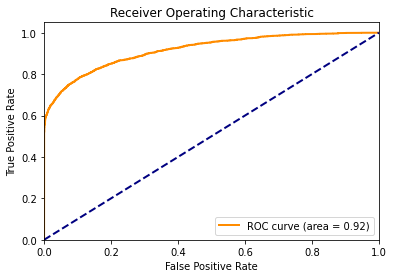

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
auc_score = roc_auc_score(y_test, y_preds)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [105]:
from sklearn.metrics import classification_report
import numpy as np

# Convert probabilities to binary predictions using a threshold
threshold = 0.5  # You can adjust this threshold if needed
y_pred_binary = np.where(y_preds >= threshold, 1, 0)

# Generate classification report
report = classification_report(y_test, y_pred_binary)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      4757
         1.0       0.88      0.73      0.80      2847

    accuracy                           0.86      7604
   macro avg       0.87      0.83      0.85      7604
weighted avg       0.86      0.86      0.86      7604



In [106]:
y_df = pd.DataFrame(y_sm, columns=['Quitter'])

# Concatenate X and y DataFrames along columns (axis=1)
SMOTE_df = pd.concat([X_sm, y_df], axis=1)

C:\Users\Jainish\anaconda3\lib\site-packages\lifelines\utils\__init__.py:693: UserWarning:



C:\Users\Jainish\anaconda3\lib\site-packages\lifelines\utils\__init__.py:693: UserWarning:





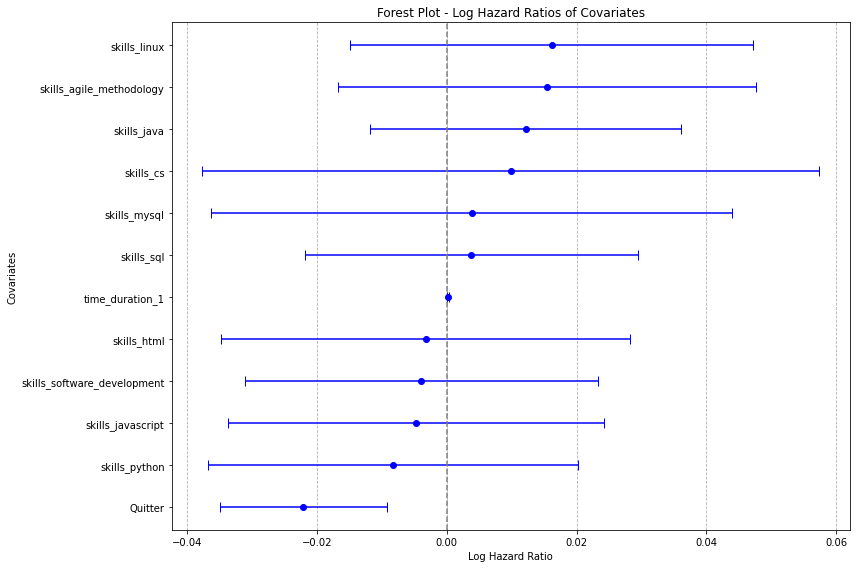

In [107]:
import pandas as pd
from lifelines.utils import datetimes_to_durations
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming df_selected is your original DataFrame

# Step 1: Filter relevant columns starting with 'skills_'
skills_columns = [col for col in df_selection if col.startswith('skills_')]
selected_columns = ['Quitter', 'time_duration_1'] + skills_columns
df_selected_skills = SMOTE_df[selected_columns]

# Step 2: Train-Test Split
train_data, test_data = train_test_split(df_selected_skills, test_size=0.2, random_state=123)

# Step 3: Convert the time and event columns to durations and events
train_data['duration'], train_data['event'] = datetimes_to_durations(train_data['time_duration_1'], train_data['Quitter'], fill_date='2023-07-25')
test_data['duration'], test_data['event'] = datetimes_to_durations(test_data['time_duration_1'], test_data['Quitter'], fill_date='2023-07-25')

# Step 4: Train the survival regression model (Cox proportional hazards)
cph = CoxPHFitter(penalizer=0.1)
cph.fit(train_data, duration_col='duration', event_col='event')

# Step 5: Get the coefficients and sort in descending order of absolute value
coefficients = cph.summary.sort_values(by='coef', ascending=True)

# Step 6: Plot the forest plot
plt.figure(figsize=(12, 8))
plt.errorbar(coefficients['coef'], coefficients.index, xerr=coefficients['se(coef)'], fmt='o', capsize=5, color='b')
plt.axvline(x=0, linestyle='--', color='gray')
plt.xlabel('Log Hazard Ratio')
plt.ylabel('Covariates')
plt.title('Forest Plot - Log Hazard Ratios of Covariates')
plt.grid(True, which='both', axis='x', linestyle='--')
plt.tight_layout()
plt.show()


This plot shows the coefficients (log hazard ratios) of the features used in the model.
Each point represents a feature, and its vertical position on the plot represents its coefficient value.
The error bars around each point represent the confidence intervals for the coefficients. A positive coefficient indicates an increased hazard (higher risk), while a negative coefficient indicates a decreased hazard (lower risk).

In [108]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.utils import datetimes_to_durations
from sklearn.model_selection import train_test_split
from lifelines.utils import concordance_index


train_data, test_data = train_test_split(SMOTE_df, test_size=0.2, random_state=123)

# Step 2: Convert the time and event columns to durations and events
train_data['duration'], train_data['event'] = datetimes_to_durations(train_data['time_duration_1'], train_data['Quitter'], fill_date='2023-07-25')
test_data['duration'], test_data['event'] = datetimes_to_durations(test_data['time_duration_1'], test_data['Quitter'], fill_date='2023-07-25')

# Step 3: Train the survival regression model (Cox proportional hazards)
cph = CoxPHFitter(penalizer=0.1)
cph.fit(train_data, duration_col='duration', event_col='event')
predicted_survival = cph.predict_survival_function(test_data)

# Step 5: Access model summary
cph.print_summary()

C:\Users\Jainish\anaconda3\lib\site-packages\lifelines\utils\__init__.py:693: UserWarning:



C:\Users\Jainish\anaconda3\lib\site-packages\lifelines\utils\__init__.py:693: UserWarning:





<lifelines.CoxPHFitter: fitted with 24332 total observations, 0 right-censored observations>
             duration col = 'duration'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 24332
number of events observed = 24332
   partial log-likelihood = -221403.30
         time fit was run = 2023-08-13 17:54:26 UTC

---
                                                                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                                                                     
time_duration_1                                                                        -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
total_exp                                                                               0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
title_work_dur_check                                                                   -0.00       1.00       0.01            -0.03             0.03                 0.97                 1.03
custom_url                                                                              0.00       1.00       0.01            -0.03             0.03                 0.97                 1.03
time_duration_2                                                                         0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
job_desc_application                                                                    0.00       1.00       0.04            -0.08             0.09                 0.92                 1.09
job_desc_software                                                                       0.00       1.00       0.04            -0.08             0.08                 0.93                 1.08
job_desc_design                                                                        -0.01       0.99       0.05            -0.11             0.10                 0.89                 1.11
job_desc_development                                                                    0.01       1.01       0.04            -0.08             0.09                 0.92                 1.10
job_desc_system                                                                         0.01       1.01       0.04            -0.08             0.10                 0.93                 1.10
job_desc_team                                                                           0.00       1.00       0.03            -0.06             0.06                 0.94                 1.06
job_desc_data                                                                          -0.00       1.00       0.04            -0.07             0.07                 0.93                 1.07
job_desc_service                                                                        0.01       1.01       0.04            -0.07             0.09                 0.93                 1.09
summary_application                                                                     0.00       1.00       0.04            -0.07             0.08                 0.93                 1.08
summary_data                                                                            0.00       1.00       0.03            -0.06             0.06                 0.94                 1.06
summary_development                                                                     0.00       1.00       0.03            -0.06             0.06                 0.94                 1.06
summary_experience                                                                     -0.00       1.00       0.03            -0.0

In [109]:
from lifelines import CoxPHFitter
from lifelines.utils import datetimes_to_durations
from sklearn.model_selection import train_test_split

# Assuming you have already trained the survival regression model 'cph' as shown in your previous code

def get_candidates_by_time_point(df, time_point_desired):
    # Step 1: Convert the time and event columns to durations and events for the entire dataset
    df['duration'], df['event'] = datetimes_to_durations(df['time_duration_1'], df['Quitter'], fill_date='2023-07-27')

    # Check if 'quitting_probability_desired' column already exists in the DataFrame and drop it if present
    if 'quitting_probability_desired' in df.columns:
        df = df.drop(columns='quitting_probability_desired')

    # Step 2: Train the survival regression model (Cox proportional hazards)
    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(df, duration_col='duration', event_col='event')

    # Step 3: Predict survival probabilities for the entire dataset at the desired time point
    predicted_probabilities_desired = cph.predict_survival_function(df, times=[time_point_desired])

    # Step 4: Extract the survival probabilities at the desired time point from the DataFrame
    quitting_probabilities_desired = predicted_probabilities_desired.iloc[0, :].values

    # Step 5: Add a new column to the DataFrame with the quitting probabilities at the desired time point
    df['quitting_probability_desired'] = quitting_probabilities_desired

    return df

def get_candidates_by_threshold(df, threshold_probability_desired):
    # Step 6: Filter candidates with quitting probability greater than the desired threshold
    candidates_with_high_probabilities = df[df['quitting_probability_desired'] > threshold_probability_desired]

    # Step 7: Sort the filtered DataFrame in descending order of quitting probability
    candidates_sorted_by_probabilities = candidates_with_high_probabilities.sort_values(by='quitting_probability_desired', ascending=False)

    return candidates_sorted_by_probabilities

In [110]:
# Example usage:
time_point_desired = 6  # Desired time point in month
threshold_probability_desired = 0.10  # Desired threshold probability (e.g., 10%)

# Call the get_candidates_by_time_point function to get the DataFrame with probabilities at the desired time point
df_with_probabilities = get_candidates_by_time_point(SMOTE_df, time_point_desired)

# Call the get_candidates_by_threshold function to get the candidates with probability > threshold
results = get_candidates_by_threshold(df_with_probabilities, threshold_probability_desired)

C:\Users\Jainish\anaconda3\lib\site-packages\lifelines\utils\__init__.py:693: UserWarning:





In [111]:
print(f"DataFrame of candidates with probability >{threshold_probability_desired*100:.1f}%, sorted in descending order of quitting probability in next {time_point_desired} months: ")
results.shape

DataFrame of candidates with probability >10.0%, sorted in descending order of quitting probability in next 6 months: 


(30414, 361)

In [112]:
print(f"DataFrame of candidates with probability >{threshold_probability_desired*100:.1f}%, sorted in descending order of quitting probability in next {time_point_desired} months: ")
merged_df = pd.merge(results, df1, left_index=True, right_index=True)
res = merged_df[['profile_url', 'First Name', 'Surname', 'title_1', 'company_1', 'time_duration_1_x', 'Region', 'total_exp_y','quitting_probability_desired' ]]
res.head()

DataFrame of candidates with probability >10.0%, sorted in descending order of quitting probability in next 6 months: 


,profile_url,First Name,Surname,title_1,company_1,time_duration_1_x,Region,total_exp_y,quitting_probability_desired
22867,https://www.linkedin.com/in/andrew-zaslow-3406296,Andrew,Zaslow,principal software developer,Battea - Class Action Services,60.0,UNKNOWN,652,0.235015
17355,https://www.linkedin.com/in/reedcowan,Reed,Cowan,software engineer,Red Hat,12.0,UNKNOWN,61,0.233009
3527,https://www.linkedin.com/in/junpeng-qiu-327869141,Junpeng,Qiu,software engineer,Amazon,16.0,UNKNOWN,37,0.182814
16912,https://www.linkedin.com/in/parthkhopkar,Parth,Khopkar,machine learning engineer,Micron Technology,67.0,UNKNOWN,48,0.182282
801,https://www.linkedin.com/in/beckcollin,Collin,Beck,senior software engineer,AirStrip Technologies,1.0,UNKNOWN,86,0.174924


In [113]:
res.tail()

,profile_url,First Name,Surname,title_1,company_1,time_duration_1_x,Region,total_exp_y,quitting_probability_desired
21025,https://www.linkedin.com/in/alejandro-villarre...,Alejandro,Villarreal,principal software engineer,ExamSoft,13.0,UNKNOWN,315,0.102217
17808,https://www.linkedin.com/in/sasidhar-reddy-965...,Sasidhar,Reddy,senior software engineer,International Paper,14.0,M,110,0.102216
12540,https://www.linkedin.com/in/atharva-kudkilwar,Atharva,Kudkilwar,software engineer intern,Balyasny Asset Management L.P.,94.0,M,20,0.101607
19297,https://www.linkedin.com/in/aaron-pixley,Aaron,Pixley,software developer,Indium Corporation,123.0,UNKNOWN,44,0.100854
15058,https://www.linkedin.com/in/john-pickard-ab32436,John,Pickard,software engineer,Everactive,121.0,S,252,0.100353
